In [1]:
%load_ext autoreload
%autoreload 2

from final_project import loader, builder, models, plots
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [2]:

# df = loader.get_df(file="Flights_2018_1.csv")
df = loader.get_df(all_files=True)

# for c in df.columns:
#     print(c)
df = df[df['Origin'] == 'BOS']
# df.drop(df[df['Origin'] == 'BOS'].index, inplace=True)

# print(df)

In [3]:


# print(len(df.columns))
# for c in df.columns:
#     print(c)

# df = loader.get_df(file="Flights_2018_1.csv")
df = df[[
    'DistanceGroup',
    'DayofMonth',
    'Month',
    'Year',
    'Duplicate',
    'ArrDel15',
    'DistanceGroup',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay'
]]
df = builder.encodeFrame(df)
x = df.drop(columns=['ArrDel15'])
y = df[['ArrDel15']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=150)
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()


# x, y = datasets.make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=2, n_redundant=1, random_state=0)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [4]:
lr_pipeline = models.get_pipeline(models.ModelENUM.LR)
param_grd = [
    models.get_lr_param(penalty=["l1"], c_list=[0.1], max_iter=[500])
]
grid_search = models.get_grid_search_cv(lr_pipeline, param_grd, cv=3, n_jobs=20)

In [5]:
model = grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 3/3; 1/1] START lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear
[CV 2/3; 1/1] START lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear
[CV 1/3; 1/1] START lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear


KeyboardInterrupt: 

In [6]:
# models.analyze_model(model, x_test, x_train, y_test, y_train)
models.analyze_model(model, x_test, x_train, y_test, y_train)

Test accuracy: 0.7453874538745386
Train accuracy: 0.7386128816321779
Precision: 1.0
Recall: 0.5941176470588235
F-Beta Score: 0.7453874538745386
F1 Score: 0.7453874538745386


5440


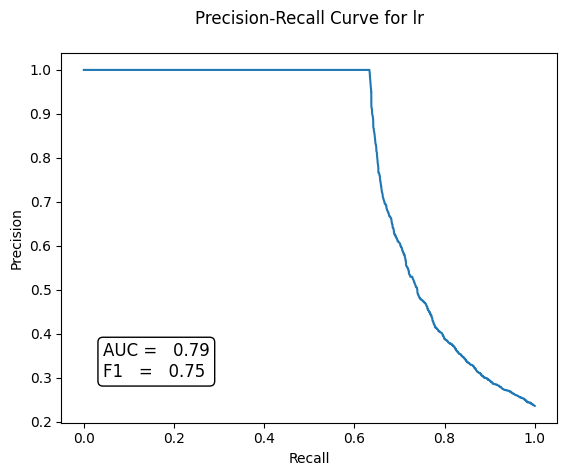

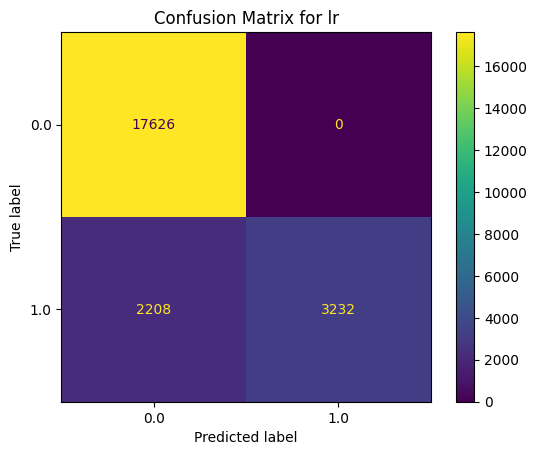

In [7]:
import numpy as np
number_true = np.count_nonzero(y_test == 1)
print(number_true)

y_prob = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)
plots.save_precision_recall_curve("lr", "test_file", y_test, y_prob)
plots.save_confusion_matrix("lr", "test_file", y_test, y_pred)

